Analysis:

- The data shows that temperature increases as you get closer to equator. Also, at this time of year temperatures are warmer south of the equator than north due to the earth's tilt.

- There is no correlation between latitude and humidity, cloudiness, or windspeed. 

- On this particular day wind speed in all the sample cities was relatively low. Most cities saw windspeed between 0 and 15 mph. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy as ow
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
     #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities2 = [city.capitalize() for city in cities]

In [3]:
lat= []
temp= []
hum= []
cloud= []
wind =[]
cityname= []


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities = np.array(cities2) 
query_url = f"{url}appid={api_key}&units={units}&q="


for city in cities:
    try:
        time.sleep(1.3)
        target_url = query_url + city
        response = requests.get(target_url).json()
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        cityname.append(response["name"])
    except: 
        continue



#print(json.dumps(response, indent=4, sort_keys=True))


In [20]:
weather_dict = {
    "city": cityname,
    "lat": lat,
    "temp": temp,
    "humidity": hum,
    "cloudiness": cloud,
    "windspeed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.head()

,city,lat,temp,humidity,cloudiness,windspeed
0,Salalah,17.01,77.00,27,0,9.17
1,New Norfolk,-42.78,57.20,58,20,5.82
2,Busselton,-33.64,63.43,100,0,18.79
3,Tawau,4.26,75.20,94,75,2.68
4,Palana,59.08,1.78,58,0,3.13


In [21]:
weather_data.to_csv("output_data/cities.csv")

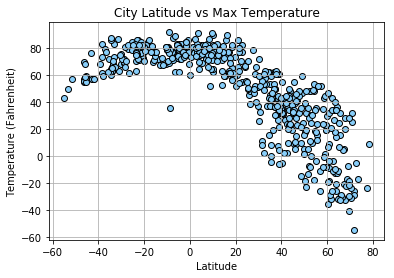

In [27]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color = "lightskyblue", edgecolors= "black")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show
plt.savefig("Images/temperature.png")

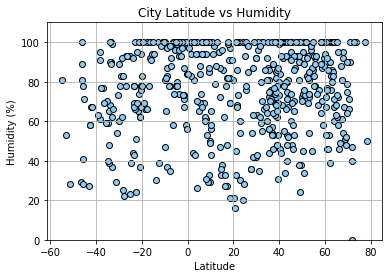

In [28]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", color = "lightskyblue", edgecolors= "black")

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 110)

plt.show
plt.savefig("Images/humidity.png")

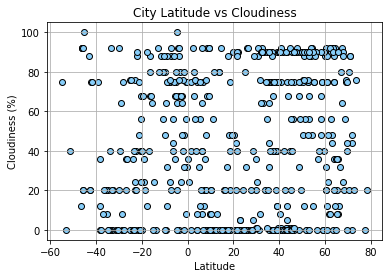

In [29]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", color = "lightskyblue", edgecolors= "black")

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show
plt.savefig("Images/cloudiness.png")

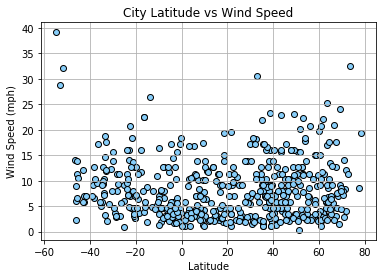

In [30]:
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o", color = "lightskyblue", edgecolors= "black")

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show
plt.savefig("Images/windspeed.png")